In [5]:
import skimage
from skimage import segmentation
import imageio.v2 as imageio
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

In [6]:
# Paths to the images
image_path = '..\\dots_and_globues\\PAT_1379_1300_924.png'
mask_path = '..\\dots_and_globues\\PAT_1379_1300_924_mask.png'

# Load the image and the mask
im_rgb = imread(image_path)
mask = imread(mask_path)

In [44]:
im_rgb.shape

(1152, 1152, 3)

In [47]:
x_mask = np.zeros((1152,1152,3))
print(x_mask.shape)
x_mask[:1]

(1152, 1152, 3)


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [55]:
mask

array([0., 0., 0.])

In [46]:
new_mask = mask.reshape((mask.shape[0], mask.shape[1], 1))

In [38]:
mask.shape

(1152, 1152)

In [77]:

n = 0
for line in mask:
    n+=1
    if n > 500:
        print(mask[n,364])
    if n > 510:
        break

133
132
133
133
133
132
132
133
133
133
133


In [41]:
new_mask.shape

(1152, 1152, 1)

In [43]:
new_mask[:1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [78]:
#triplicate the mask to make it fit for an rgb image
rgb_mask = mask
for line in rgb_mask:
    for pixel in line:
        if pixel == 255:
            pixel = 1
        else:
            pixel = 0

In [79]:
n = 0
for line in rgb_mask:
    n+=1
    if n > 500:
        print(rgb_mask[n,364])
    if n > 510:
        break

133
132
133
133
133
132
132
133
133
133
133


In [26]:
# Apply the mask to the binary image
masked = np.logical_and(im_rgb,mask)


ValueError: operands could not be broadcast together with shapes (1152,1152,3) (1152,1152) 

In [7]:
# Function to create a figure
def create_figure(size=(8, 8)):
    return plt.figure(figsize=size)

# Function to display an image in a subplot
def show_image(image, title='', pos=None):
    if pos is not None:
        plt.subplot(pos)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

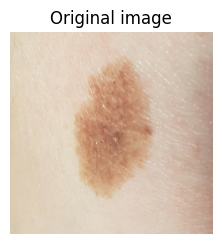

In [8]:
# Show images
create_figure((12, 6))
show_image(np.clip(im_rgb, 0, 256), title='Original image', pos=241)
#show_image(masked, title='Masked image', pos=242)
plt.show()  # This ensures that the plot is displayed

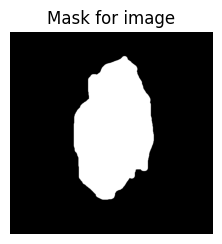

In [9]:
create_figure((12,6))
show_image(np.clip(mask, 0, 256), title='Mask for image', pos=241)
plt.show()

In [10]:
mask[500]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [11]:
im_rgb[500]

array([[216, 200, 175],
       [216, 200, 175],
       [217, 201, 176],
       ...,
       [176, 148, 134],
       [174, 146, 132],
       [172, 144, 130]], dtype=uint8)